# Team Game Stats Deep Dive

## Importing and Describing Data

In [240]:
# Importing base packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#===================
# PCA packages for Feature Reduction
#===================
from sklearn.decomposition import PCA as pca
from sklearn import preprocessing

#===================
# Logistic Regression Model - to predit wins/loss
#===================
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Alternative model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
#===================
# Linear Regression Packages (to predict points scored)
#===================

#For QQ Plot
import scipy.stats as sts

#Correlation p-values
from scipy.stats import pearsonr

#Regression output
from sklearn.linear_model import LinearRegression

#===================
# Decision Tree Packages (to predict win/loss)
#===================

from sklearn import tree
from sklearn import metrics


# Neural Networks
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [241]:

# Reading in data
os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/clean')

df = pd.read_csv('team_game_stats_data_2022_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   game_id               3150 non-null   int64  
 1   school                3150 non-null   object 
 2   conference            3128 non-null   object 
 3   homeAway              3150 non-null   object 
 4   points                3150 non-null   int64  
 5   completionAttempts    3148 non-null   object 
 6   defensiveTDs          1765 non-null   float64
 7   firstDowns            3148 non-null   float64
 8   fourthDownEff         3148 non-null   object 
 9   fumblesLost           3148 non-null   float64
 10  fumblesRecovered      3148 non-null   float64
 11  interceptionTDs       1753 non-null   float64
 12  interceptionYards     1753 non-null   float64
 13  interceptions         3148 non-null   float64
 14  kickReturnTDs         2734 non-null   float64
 15  kickReturnYards      

In [242]:
df_num = df.select_dtypes(include= np.number)
df_num

,game_id,points,defensiveTDs,firstDowns,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,...,fourthEffpct,possession_min_temp,possession_sec_temp,possessionTime_sec,third_success,third_attempts,thirdDownEffpct,penalty_flags,penalty_yards,win_loss
0,401403853,10,0.0,20.0,2.0,0.0,NaN,NaN,0.0,0.0,...,0.000000,28.0,57.0,1737.0,5.0,16.0,0.312500,8.0,72.0,0
1,401403854,55,0.0,30.0,0.0,0.0,NaN,NaN,1.0,0.0,...,NaN,31.0,51.0,1911.0,6.0,10.0,0.600000,6.0,40.0,0
2,401403855,31,0.0,23.0,1.0,2.0,0.0,51.0,0.0,0.0,...,NaN,28.0,36.0,1716.0,8.0,16.0,0.500000,7.0,63.0,0
3,401403856,42,0.0,22.0,0.0,0.0,NaN,NaN,2.0,0.0,...,0.500000,27.0,57.0,1677.0,4.0,8.0,0.500000,3.0,20.0,1
4,401403857,29,0.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,27.0,43.0,1663.0,7.0,12.0,0.583333,7.0,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,401507088,3,0.0,14.0,0.0,2.0,NaN,NaN,0.0,0.0,...,0.333333,40.0,9.0,2409.0,3.0,19.0,0.157895,7.0,40.0,0
3146,401508850,32,NaN,28.0,2.0,0.0,NaN,NaN,1.0,0.0,...,0.250000,28.0,47.0,1727.0,6.0,15.0,0.400000,6.0,58.0,0
3147,401508851,18,NaN,15.0,0.0,0.0,NaN,NaN,0.0,0.0,...,0.666667,27.0,12.0,1632.0,3.0,11.0,0.272727,4.0,20.0,0
3148,401508870,14,NaN,14.0,0.0,1.0,NaN,NaN,1.0,0.0,...,0.500000,22.0,51.0,1371.0,1.0,11.0,0.090909,3.0,25.0,0


In [243]:
df_num.columns

Index(['game_id', 'points', 'defensiveTDs', 'firstDowns', 'fumblesLost',
       'fumblesRecovered', 'interceptionTDs', 'interceptionYards',
       'interceptions', 'kickReturnTDs', 'kickReturnYards', 'kickReturns',
       'kickingPoints', 'netPassingYards', 'passesDeflected',
       'passesIntercepted', 'passingTDs', 'puntReturnTDs', 'puntReturnYards',
       'puntReturns', 'qbHurries', 'rushingAttempts', 'rushingTDs',
       'rushingYards', 'sacks', 'tackles', 'tacklesForLoss', 'totalFumbles',
       'totalYards', 'turnovers', 'yardsPerPass', 'yardsPerRushAttempt',
       'completions', 'attempts', 'completionPercentage', 'fourth_success',
       'fourth_attempts', 'fourthEffpct', 'possession_min_temp',
       'possession_sec_temp', 'possessionTime_sec', 'third_success',
       'third_attempts', 'thirdDownEffpct', 'penalty_flags', 'penalty_yards',
       'win_loss'],
      dtype='object')

In [244]:
df_sub = df_num.loc[:, ~df_num.columns.isin(['game_id'])]
df_sub

,points,defensiveTDs,firstDowns,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,kickReturnYards,...,fourthEffpct,possession_min_temp,possession_sec_temp,possessionTime_sec,third_success,third_attempts,thirdDownEffpct,penalty_flags,penalty_yards,win_loss
0,10,0.0,20.0,2.0,0.0,NaN,NaN,0.0,0.0,89.0,...,0.000000,28.0,57.0,1737.0,5.0,16.0,0.312500,8.0,72.0,0
1,55,0.0,30.0,0.0,0.0,NaN,NaN,1.0,0.0,18.0,...,NaN,31.0,51.0,1911.0,6.0,10.0,0.600000,6.0,40.0,0
2,31,0.0,23.0,1.0,2.0,0.0,51.0,0.0,0.0,16.0,...,NaN,28.0,36.0,1716.0,8.0,16.0,0.500000,7.0,63.0,0
3,42,0.0,22.0,0.0,0.0,NaN,NaN,2.0,0.0,23.0,...,0.500000,27.0,57.0,1677.0,4.0,8.0,0.500000,3.0,20.0,1
4,29,0.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,81.0,...,1.000000,27.0,43.0,1663.0,7.0,12.0,0.583333,7.0,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3,0.0,14.0,0.0,2.0,NaN,NaN,0.0,0.0,71.0,...,0.333333,40.0,9.0,2409.0,3.0,19.0,0.157895,7.0,40.0,0
3146,32,NaN,28.0,2.0,0.0,NaN,NaN,1.0,0.0,78.0,...,0.250000,28.0,47.0,1727.0,6.0,15.0,0.400000,6.0,58.0,0
3147,18,NaN,15.0,0.0,0.0,NaN,NaN,0.0,0.0,168.0,...,0.666667,27.0,12.0,1632.0,3.0,11.0,0.272727,4.0,20.0,0
3148,14,NaN,14.0,0.0,1.0,NaN,NaN,1.0,0.0,30.0,...,0.500000,22.0,51.0,1371.0,1.0,11.0,0.090909,3.0,25.0,0


## Running PCA

In [245]:
df_pca = df_sub.dropna()

In [246]:
# Scalling the data (not necessary for these data, but provided as an example)
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df_pca)
# Since data have different scaling need to run this (46 components since there are 46 variables)
pca_result = pca(n_components=46).fit(df_pca)

#Obtain eigenvalues (will only pick those values > 1 to keep)
pca_result.explained_variance_

# 26 values are > 1... so our model can have up to 26 values... need to check plot

array([6.92736987e+04, 1.66037074e+04, 8.91107953e+03, 1.21273383e+03,
       7.51109711e+02, 6.25286551e+02, 6.07454479e+02, 2.88684145e+02,
       9.66085602e+01, 8.82651737e+01, 4.91860154e+01, 2.63872139e+01,
       9.74592877e+00, 8.75254029e+00, 7.36311443e+00, 6.30498069e+00,
       5.29769550e+00, 4.63953733e+00, 3.98671137e+00, 2.53073082e+00,
       2.22551070e+00, 1.74533708e+00, 1.53727619e+00, 1.40497069e+00,
       1.23410485e+00, 1.06785953e+00, 8.97709693e-01, 7.58848267e-01,
       5.85350502e-01, 4.80571180e-01, 3.83944429e-01, 3.58986654e-01,
       2.98644730e-01, 2.37794567e-01, 1.78440072e-01, 1.50311471e-01,
       5.16875852e-02, 3.01053851e-02, 2.77626667e-02, 1.34787107e-02,
       1.75161632e-03, 1.52673266e-03, 8.91369859e-04, 3.71760799e-28,
       2.95942878e-28, 2.95942878e-28])

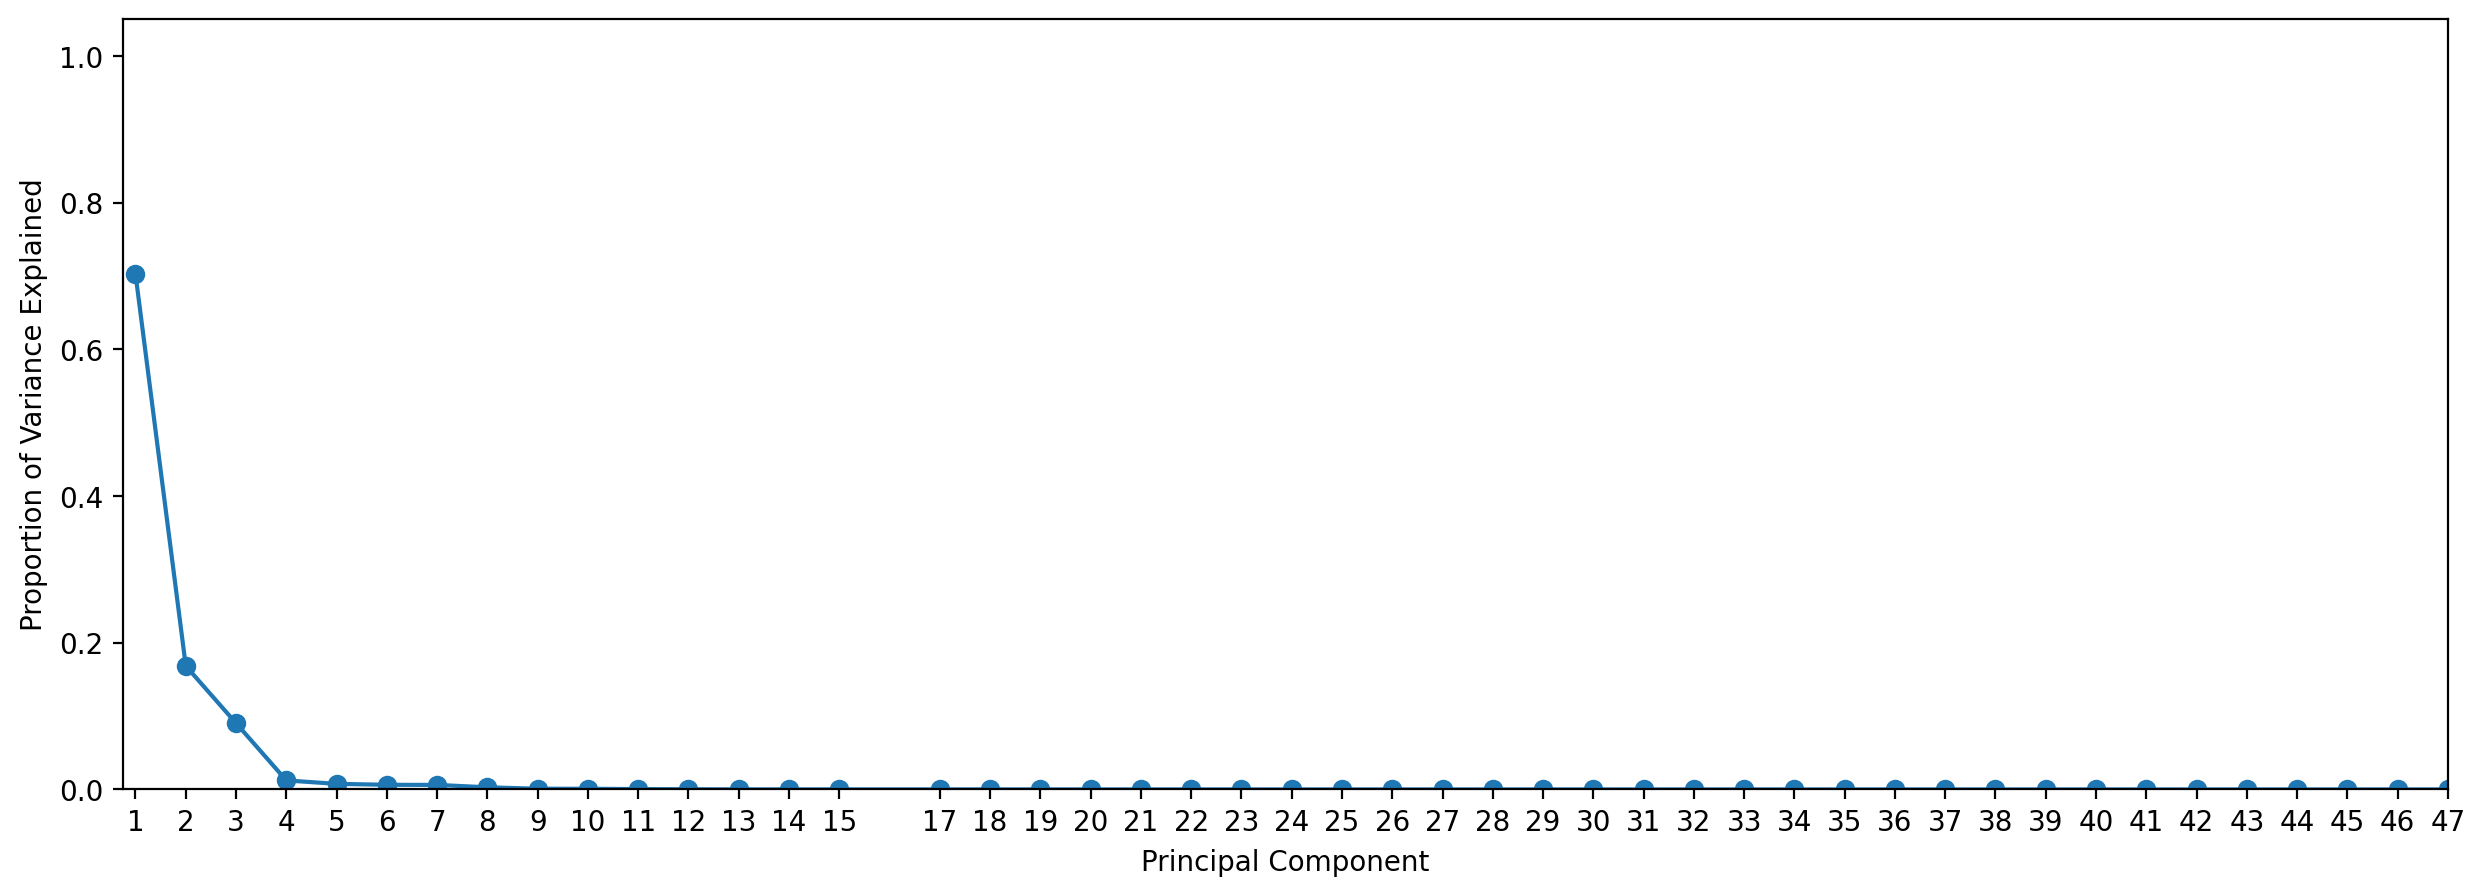

In [247]:
# Creating a screeplot
# Run this group of code together by highlighting it
# all and then running it
plt.figure(figsize=(15,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47])

plt.show()

# Plot shows that ther are really only 4 values needed

## Create a Logistic Regression Model

In [248]:
# Remove points
df_pca

,points,defensiveTDs,firstDowns,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,kickReturnYards,...,fourthEffpct,possession_min_temp,possession_sec_temp,possessionTime_sec,third_success,third_attempts,thirdDownEffpct,penalty_flags,penalty_yards,win_loss
15,44,0.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,34.0,...,0.666667,34.0,37.0,2077.0,9.0,16.0,0.562500,10.0,122.0,1
17,16,0.0,12.0,0.0,0.0,0.0,0.0,2.0,0.0,70.0,...,0.333333,26.0,36.0,1596.0,4.0,16.0,0.250000,3.0,28.0,0
19,65,1.0,23.0,0.0,8.0,1.0,29.0,2.0,0.0,18.0,...,0.000000,31.0,14.0,1874.0,7.0,12.0,0.583333,6.0,40.0,1
20,59,0.0,25.0,0.0,4.0,0.0,4.0,1.0,0.0,38.0,...,0.000000,23.0,44.0,1424.0,3.0,8.0,0.375000,9.0,79.0,1
22,40,1.0,18.0,1.0,0.0,0.0,3.0,0.0,0.0,24.0,...,1.000000,32.0,1.0,1921.0,4.0,13.0,0.307692,8.0,68.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,24,0.0,21.0,1.0,0.0,0.0,21.0,1.0,0.0,127.0,...,1.000000,37.0,48.0,2268.0,4.0,14.0,0.285714,2.0,20.0,1
3083,16,0.0,17.0,0.0,0.0,0.0,2.0,2.0,0.0,32.0,...,0.000000,35.0,32.0,2132.0,10.0,21.0,0.476190,8.0,60.0,1
3084,45,0.0,27.0,0.0,1.0,0.0,0.0,3.0,0.0,18.0,...,1.000000,36.0,19.0,2179.0,11.0,19.0,0.578947,4.0,40.0,1
3085,24,0.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,38.0,...,0.000000,38.0,10.0,2290.0,11.0,17.0,0.647059,8.0,55.0,0


In [249]:
df_pca.columns

Index(['points', 'defensiveTDs', 'firstDowns', 'fumblesLost',
       'fumblesRecovered', 'interceptionTDs', 'interceptionYards',
       'interceptions', 'kickReturnTDs', 'kickReturnYards', 'kickReturns',
       'kickingPoints', 'netPassingYards', 'passesDeflected',
       'passesIntercepted', 'passingTDs', 'puntReturnTDs', 'puntReturnYards',
       'puntReturns', 'qbHurries', 'rushingAttempts', 'rushingTDs',
       'rushingYards', 'sacks', 'tackles', 'tacklesForLoss', 'totalFumbles',
       'totalYards', 'turnovers', 'yardsPerPass', 'yardsPerRushAttempt',
       'completions', 'attempts', 'completionPercentage', 'fourth_success',
       'fourth_attempts', 'fourthEffpct', 'possession_min_temp',
       'possession_sec_temp', 'possessionTime_sec', 'third_success',
       'third_attempts', 'thirdDownEffpct', 'penalty_flags', 'penalty_yards',
       'win_loss'],
      dtype='object')

In [250]:
# Checking if these columns can be removed - they can and are removed below
df_sub[['possession_min_temp', 'possession_sec_temp', 'possessionTime_sec']]

,possession_min_temp,possession_sec_temp,possessionTime_sec
0,28.0,57.0,1737.0
1,31.0,51.0,1911.0
2,28.0,36.0,1716.0
3,27.0,57.0,1677.0
4,27.0,43.0,1663.0
...,...,...,...
3145,40.0,9.0,2409.0
3146,28.0,47.0,1727.0
3147,27.0,12.0,1632.0
3148,22.0,51.0,1371.0


In [251]:
# Removing points at this will always determine if sombody wins or loses
df_lr = df_pca.loc[:, ~df_pca.columns.isin(['points', 'possession_min_temp', 'possession_sec_temp'])]

In [252]:
df_lr.columns

Index(['defensiveTDs', 'firstDowns', 'fumblesLost', 'fumblesRecovered',
       'interceptionTDs', 'interceptionYards', 'interceptions',
       'kickReturnTDs', 'kickReturnYards', 'kickReturns', 'kickingPoints',
       'netPassingYards', 'passesDeflected', 'passesIntercepted', 'passingTDs',
       'puntReturnTDs', 'puntReturnYards', 'puntReturns', 'qbHurries',
       'rushingAttempts', 'rushingTDs', 'rushingYards', 'sacks', 'tackles',
       'tacklesForLoss', 'totalFumbles', 'totalYards', 'turnovers',
       'yardsPerPass', 'yardsPerRushAttempt', 'completions', 'attempts',
       'completionPercentage', 'fourth_success', 'fourth_attempts',
       'fourthEffpct', 'possessionTime_sec', 'third_success', 'third_attempts',
       'thirdDownEffpct', 'penalty_flags', 'penalty_yards', 'win_loss'],
      dtype='object')

### Create Train and Validation Split

In [253]:
# Split into Training and Test
features = ['defensiveTDs', 'firstDowns', 'fumblesLost', 'fumblesRecovered',
       'interceptionTDs', 'interceptionYards', 'interceptions',
       'kickReturnTDs', 'kickReturnYards', 'kickReturns', 'kickingPoints',
       'netPassingYards', 'passesDeflected', 'passesIntercepted', 'passingTDs',
       'puntReturnTDs', 'puntReturnYards', 'puntReturns', 'qbHurries',
       'rushingAttempts', 'rushingTDs', 'rushingYards', 'sacks', 'tackles',
       'tacklesForLoss', 'totalFumbles', 'totalYards', 'turnovers',
       'yardsPerPass', 'yardsPerRushAttempt', 'completions', 'attempts',
       'completionPercentage', 'fourth_success', 'fourth_attempts',
       'fourthEffpct', 'possessionTime_sec', 'third_success', 'third_attempts',
       'thirdDownEffpct', 'penalty_flags', 'penalty_yards']

X = df_lr.loc[:,features]
y = df_lr.loc[:,['win_loss']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

## Create Logistic Regression Model

In [254]:
# Creating instance of model
logreg1 = LogisticRegression()

In [255]:
logreg1.fit(X_train, y_train)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [256]:
y_predlr = logreg1.predict(X_test)

In [257]:
# Scoring mode - (result - 58% accuracy)
logreg1.score(X_test, y_test)

0.5818181818181818

## Scaling Data then Running Logistic Regression

In [258]:
# Initiating scaler
scaler = StandardScaler()

In [259]:
# Scaling data
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [260]:
# Fitting model
logreg1.fit(X_train_s, y_train)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [261]:
# Predict values
y_predlr2 = logreg1.predict(X_test_s)

In [262]:
# Getting score log logistic regression (Slight improvement)
logreg1.score(X_test_s, y_test)

0.5909090909090909

## Running Logistic Regression Another Way

In [81]:
# Run the logistic regression (insignificant model)
logreg2 = smf.logit('win_loss ~ defensiveTDs + firstDowns + fumblesLost + fumblesRecovered + interceptionTDs + interceptionYards + interceptions + kickReturnTDs + kickReturnYards + kickReturns + kickingPoints + netPassingYards + passesDeflected + passesIntercepted + passingTDs + puntReturnTDs + puntReturnYards + puntReturns + qbHurries + rushingAttempts + rushingTDs + rushingYards + sacks + tackles + tacklesForLoss + totalFumbles + totalYards + turnovers + yardsPerPass + yardsPerRushAttempt + completions + attempts + completionPercentage + fourth_success + fourth_attempts + fourthEffpct  + possessionTime_sec + third_success + third_attempts + thirdDownEffpct + penalty_flags + penalty_yards', df_lr).fit()
logreg2.summary()

         Current function value: 0.531409
         Iterations: 35


/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               win_loss   No. Observations:                  365
Model:                          Logit   Df Residuals:                      323
Method:                           MLE   Df Model:                           41
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.2328
Time:                        11:19:35   Log-Likelihood:                -193.96
converged:                      False   LL-Null:                       -252.83
Covariance Type:            nonrobust   LLR p-value:                 2.416e-09
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.9040      2.949      0.646      0.519      -3.876       7.684
defensiveTDs            -0.7932      1.932     -0.410      0.681      -4.581       2.994
firstDowns               0.0509      0.071      0.717      0.473      -0.088       0.190
fumblesLost             -0.2363   2.66e+06   -8.9e-08      1.000    -5.2e+06     5.2e+06
fumblesRecovered         0.0278      0.097      0.286      0.775      -0.163       0.219
interceptionTDs          1.4031      1.967      0.713      0.476      -2.453       5.259
interceptionYards       -0.0015      0.007     -0.210      0.833      -0.016       0.013
interceptions            0.1884   2.66e+06    7.1e-08      1.000    -5.2e+06     5.2e+06
kickReturnTDs            1.1965      2.192      0.546      0.585      -3.099       5.492
kickReturnYards          0.0096      0.007      1.337      0.181      -0.004       0.024
kickReturns             -0.4441      0.178     -2.489      0.013      -0.794      -0.094
kickingPoints            0.0401      0.051      0.789      0.430      -0.060       0.140
netPassingYards         -0.0056      0.017     -0.329      0.742      -0.039       0.028
passesDeflected          0.1142      0.058      1.981      0.048       0.001       0.227
passesIntercepted        0.1806      0.197      0.917      0.359      -0.206       0.567
passingTDs               0.2757      0.154      1.788      0.074      -0.026       0.578
puntReturnTDs            0.4191      2.150      0.195      0.845      -3.795       4.634
puntReturnYards          0.0038      0.009      0.419      0.675      -0.014       0.022
puntReturns              0.1913      0.148      1.291      0.197      -0.099       0.482
qbHurries               -0.0230      0.053     -0.433      0.665      -0.127       0.081
rushingAttempts         -0.0615      0.063     -0.969      0.333      -0.186       0.063
rushingTDs               0.4921      0.160      3.077      0.002       0.179       0.805
rushingYards             0.0038      0.017      0.222      0.825      -0.030       0.038
sacks                    0.1022      0.103      0.988      0.323      -0.101       0.305
tackles                 -0.0206      0.014     -1.496      0.135      -0.048       0.006
tacklesForLoss           0.0850      0.064      1.335      0.182      -0.040       0.210
totalFumbles            -0.3022      0.166     -1.821      0.069      -0.627       0.023
totalYards              -0.0025      0.017     -0.145      0.885      -0.036       0.031
turnovers               -0.0478   2.66e+06   -1.8e-08      1.000    -5.2e+06     5.2e+06
yardsPerPass             0.2039      0.228      0.895      0.371      -0.243       0.650
yardsPerRushAttempt     -0.1305      0.357     -0.366      0.715      -0.830       0.569
completions              0.0378      0.113      0.336      0.737      -0.183       0.259
attempts                -0.0269      0.066     -0.408      0.683      -0.156       0.102
completionPercentage    -4.4145      

### Eliminating Non-Significant Features into a New Model

In [90]:
# Split into Training and Test
# Keeping features with a Z-score < 0.5 (not 0.05)
features2 = ['firstDowns','interceptionTDs', 'kickReturnYards', 'kickReturns', 'kickingPoints','passesDeflected', 'passesIntercepted', 'passingTDs',
              'puntReturns', 'rushingAttempts', 'rushingTDs', 'sacks', 'tackles','tacklesForLoss', 'totalFumbles','yardsPerPass', 'completionPercentage', 
              'fourth_attempts','fourthEffpct', 'penalty_flags', 'penalty_yards']

X2 = df_lr.loc[:,features2]
y2 = df_lr.loc[:,['win_loss']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0, train_size = .70)

In [91]:
# Scaling data
X_train_s2 = scaler.fit_transform(X_train2)
X_test_s2 = scaler.transform(X_test2)

In [92]:
# Fitting model
logreg1.fit(X_train_s2, y_train2)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [93]:
# Predict values
y_predlr3 = logreg1.predict(X_test_s2)

In [94]:
# Getting score log logistic regression (Very Slight Improvement 0.59 > 0.60)
logreg1.score(X_test_s2, y_test2)

0.6

# Decision Tree Model

In [175]:
# Adding in a string column to train and test win_loss
def win_loss(value):
    if value == 1:
        return "win"
    elif value == 0:
        return "loss"

y_train['win_loss_str'] = y_train['win_loss'].map(win_loss)
y_test['win_loss_str'] = y_test['win_loss'].map(win_loss)

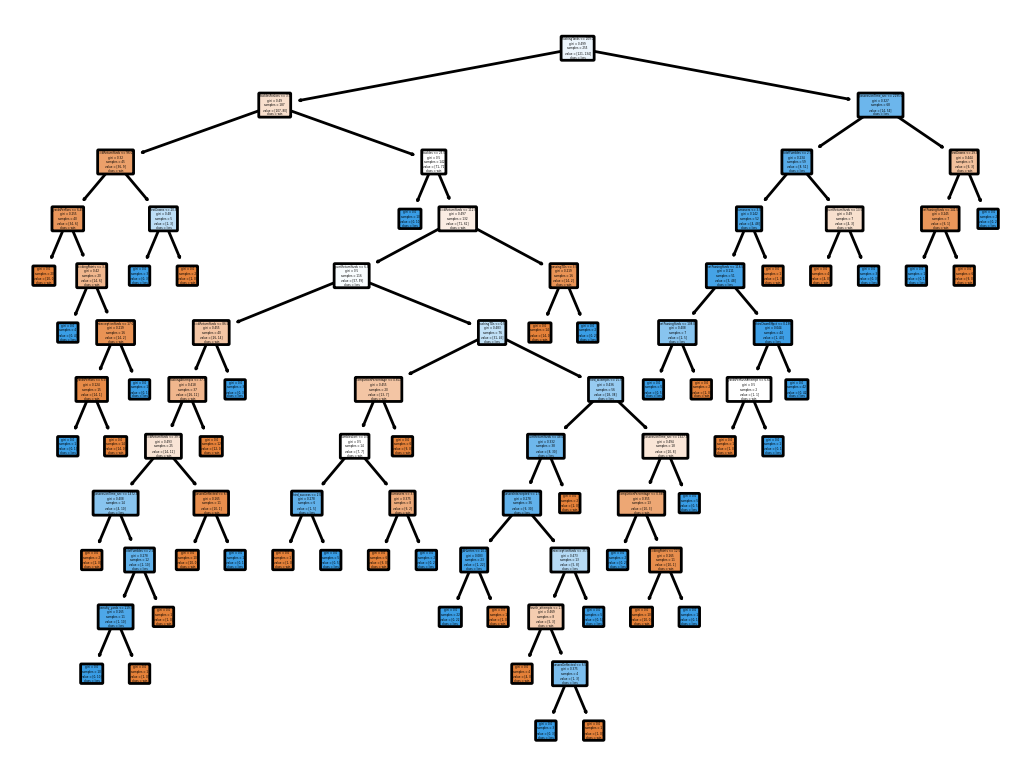

In [176]:
# Creating decision tree
col_names = list(X_train.columns)
classnames = list(y_train.win_loss_str.unique())

# Creating a decision tree using the original, unscaled data
tre1 = tree.DecisionTreeClassifier().fit(X_train,y_train.win_loss_str)

# Plotting the tree
tree.plot_tree(tre1,feature_names=col_names,class_names=classnames,filled=True,rounded=True)
plt.show()

In [177]:
# Accessing Accuracy of First Decision Tree
predicted = tre1.predict(X_test)

print(metrics.classification_report(y_test.win_loss_str, predicted))

# Confusion Matrix
cm = metrics.confusion_matrix(y_test.win_loss_str, predicted)
print(cm)

              precision    recall  f1-score   support

        loss       0.58      0.54      0.56        56
         win       0.55      0.59      0.57        54

    accuracy                           0.56       110
   macro avg       0.56      0.56      0.56       110
weighted avg       0.56      0.56      0.56       110

[[30 26]
 [22 32]]


In [124]:
# Changing default settings of the dpi for plots using plt to make it easier to see
plt.rcParams['figure.dpi'] = 200

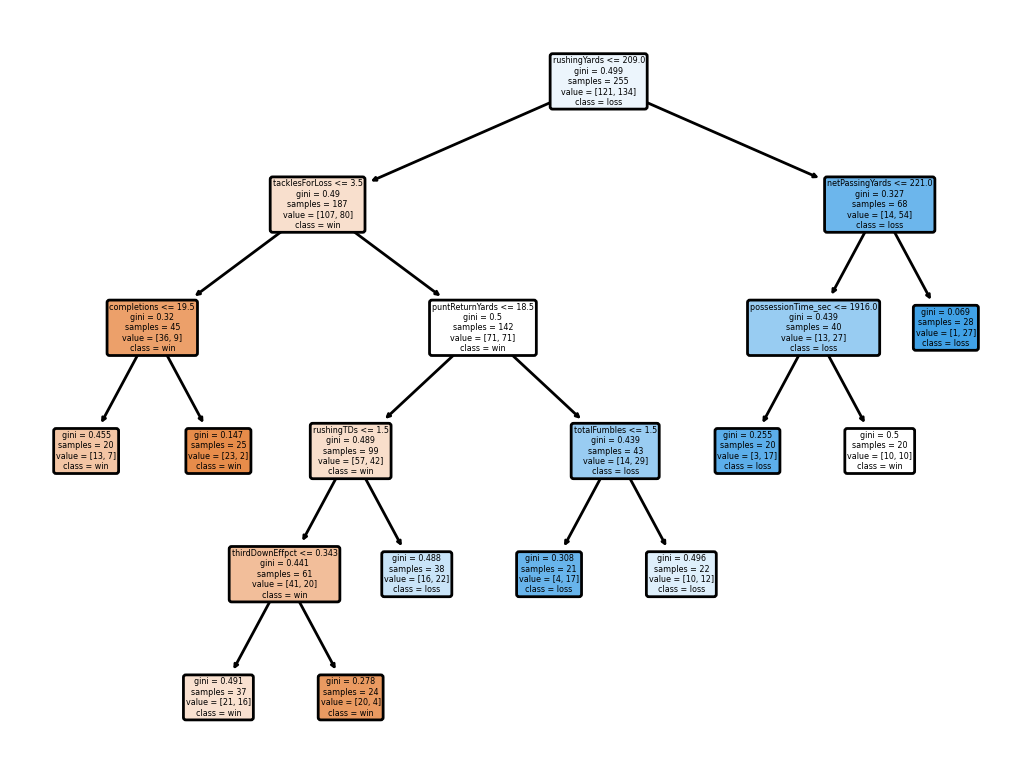

In [178]:
# Pruning the decision tree
tre2 = tree.DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=20).fit(X_train,y_train.win_loss_str)
tree.plot_tree(tre2,feature_names=col_names,class_names=classnames,filled=True,rounded=True)
plt.show()

In [179]:
# Accessing Accuracy of Second Decision Tree
predicted2 = tre2.predict(X_test)

print(metrics.classification_report(y_test.win_loss_str, predicted))

# Confusion Matrix
cm = metrics.confusion_matrix(y_test.win_loss_str, predicted)
print(cm)

# The accuracy of this model did not change and is much easier to understand

              precision    recall  f1-score   support

        loss       0.58      0.54      0.56        56
         win       0.55      0.59      0.57        54

    accuracy                           0.56       110
   macro avg       0.56      0.56      0.56       110
weighted avg       0.56      0.56      0.56       110

[[30 26]
 [22 32]]


## Neural Network

In [287]:
# Create neutral network model
nnclass1 = MLPClassifier(activation='logistic', solver='sgd', # Logsitic 
                      hidden_layer_sizes=(100,100), # Two hidden layers with 100 nodes each
                      early_stopping=True) # Set to True so that when the model no longer performs better, it will stop

In [288]:
# Pass in variables to ANN and predict values
nnclass1.fit(X_train_s, y_train.win_loss)

nnclass1_pred = nnclass1.predict(X_test_s)

In [289]:
# Create confusion matrix
cm = metrics.confusion_matrix(y_test, nnclass1_pred)
print(cm)

[[28 28]
 [19 35]]


In [290]:
# Obtain fit stats
print(metrics.classification_report(y_test, nnclass1_pred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.54        56
           1       0.56      0.65      0.60        54

    accuracy                           0.57       110
   macro avg       0.58      0.57      0.57       110
weighted avg       0.58      0.57      0.57       110



## Linear Regression
The purpose of this section is to use Linear Regression to predict points scored

In [200]:
# Eliminate na from dataset
df_num_no_na = df_num.dropna()

In [204]:
# Rerun linear regression excluding NAs, point and TD variables
linreg_nona = smf.ols('points ~  firstDowns + fumblesLost + fumblesRecovered + interceptionYards + interceptions + kickReturnYards + kickReturns + netPassingYards + passesDeflected + passesIntercepted + puntReturnYards + puntReturns + qbHurries + rushingAttempts + rushingYards + sacks + tackles + tacklesForLoss + totalFumbles + totalYards + turnovers + yardsPerPass + yardsPerRushAttempt + completions + attempts + completionPercentage + fourth_success + fourth_attempts + fourthEffpct  + possessionTime_sec + third_success + third_attempts + thirdDownEffpct + penalty_flags + penalty_yards', df_num_no_na).fit()
linreg_nona.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     41.13
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.67e-97
Time:                        06:04:51   Log-Likelihood:                -1191.3
No. Observations:                 365   AIC:                             2451.
Df Residuals:                     331   BIC:                             2583.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.2396      7.435     -0.301      0.763     -16.866      12.386
firstDowns              -0.0176      0.197     -0.090      0.929      -0.405       0.370
fumblesLost             -0.8125      0.413     -1.967      0.050      -1.625       0.000
fumblesRecovered         0.7570      0.228      3.324      0.001       0.309       1.205
interceptionYards        0.0907      0.016      5.552      0.000       0.059       0.123
interceptions           -0.3932      0.342     -1.151      0.250      -1.065       0.279
kickReturnYards          0.0668      0.017      3.926      0.000       0.033       0.100
kickReturns             -0.8606      0.450     -1.912      0.057      -1.746       0.025
netPassingYards          0.0396      0.015      2.670      0.008       0.010       0.069
passesDeflected          0.0219      0.158      0.138      0.890      -0.290       0.334
passesIntercepted        1.2614      0.545      2.315      0.021       0.189       2.333
puntReturnYards          0.0473      0.019      2.549      0.011       0.011       0.084
puntReturns              0.5078      0.393      1.293      0.197      -0.265       1.280
qbHurries                0.2689      0.150      1.791      0.074      -0.026       0.564
rushingAttempts          0.5130      0.165      3.105      0.002       0.188       0.838
rushingYards            -0.0056      0.017     -0.321      0.748      -0.040       0.029
sacks                   -0.0439      0.283     -0.155      0.877      -0.600       0.512
tackles                 -0.0123      0.038     -0.323      0.747      -0.087       0.063
tacklesForLoss           0.3066      0.172      1.780      0.076      -0.032       0.646
totalFumbles            -0.5085      0.425     -1.196      0.232      -1.345       0.328
totalYards               0.0341      0.010      3.314      0.001       0.014       0.054
turnovers               -1.2058      0.229     -5.269      0.000      -1.656      -0.756
yardsPerPass             0.0727      0.566      0.128      0.898      -1.040       1.185
yardsPerRushAttempt      1.3506      0.884      1.528      0.127      -0.388       3.089
completions             -0.0303      0.281     -0.108      0.914      -0.584       0.523
attempts                 0.0781      0.166      0.470      0.638      -0.248       0.405
completionPercentage    -1.3681      8.693     -0.157      0.875     -18.469      15.733
fourth_success           2.1236      0.940      2.259      0.025       0.275       3.973
fourth_attempts         -1.3842      0.621     -2.229      0.026      -2.606      -0.163
fourthEffpct             2.1383      1.851      1.155      0.249      -1.503       5.780
possessionTime_sec      -0.0052      0.002     -2.369      0.018      -0.009      -0.001
third_success           -0.0321      0.866     -0.037    

In [212]:
# Keeping only those vars that are < 0.05
linreg_nona2 = smf.ols('points ~  fumblesLost + fumblesRecovered + interceptionYards + kickReturnYards + netPassingYards + passesIntercepted + puntReturnYards + rushingAttempts + totalYards + turnovers + fourth_success + fourth_attempts + possessionTime_sec + third_attempts', df_num_no_na).fit()
linreg_nona2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     89.62
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.92e-106
Time:                        06:23:56   Log-Likelihood:                -1210.8
No. Observations:                 365   AIC:                             2452.
Df Residuals:                     350   BIC:                             2510.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.1161      3.323      1.841      0.067      -0.419      12.651
fumblesLost           -0.1967      0.621     -0.317      0.752      -1.418       1.025
fumblesRecovered       0.7930      0.220      3.605      0.000       0.360       1.226
interceptionYards      0.0885      0.016      5.423      0.000       0.056       0.121
kickReturnYards        0.0318      0.011      2.986      0.003       0.011       0.053
netPassingYards        0.0114      0.008      1.342      0.181      -0.005       0.028
passesIntercepted      1.2884      0.547      2.355      0.019       0.213       2.364
puntReturnYards        0.0700      0.014      4.860      0.000       0.042       0.098
rushingAttempts        0.3641      0.074      4.911      0.000       0.218       0.510
totalYards             0.0776      0.007     10.810      0.000       0.064       0.092
turnovers             -1.6934      0.392     -4.319      0.000      -2.465      -0.922
fourth_success         2.7825      0.504      5.516      0.000       1.790       3.775
fourth_attempts       -2.3660      0.411     -5.753      0.000      -3.175      -1.557
possessionTime_sec    -0.0062      0.002     -3.306      0.001      -0.010      -0.003
third_attempts        -0.9645      0.153     -6.294      0.000      -1.266      -0.663
==============================================================================
Omnibus:                       12.017   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.467
Skew:                           0.355   Prob(JB):                      0.00119
Kurtosis:                       3.618   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
# Keeping only those vars that are < 0.05
linreg_nona3 = smf.ols('points ~  fumblesRecovered + interceptionYards + kickReturnYards + passesIntercepted + puntReturnYards + rushingAttempts + totalYards + turnovers + fourth_success + fourth_attempts + possessionTime_sec + third_attempts', df_num_no_na).fit()
linreg_nona3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     104.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          4.63e-108
Time:                        06:25:24   Log-Likelihood:                -1211.8
No. Observations:                 365   AIC:                             2450.
Df Residuals:                     352   BIC:                             2500.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4088      3.311      1.936      0.054      -0.103      12.921
fumblesRecovered       0.7718      0.218      3.537      0.000       0.343       1.201
interceptionYards      0.0873      0.016      5.359      0.000       0.055       0.119
kickReturnYards        0.0307      0.011      2.894      0.004       0.010       0.052
passesIntercepted      1.3010      0.547      2.380      0.018       0.226       2.376
puntReturnYards        0.0694      0.014      4.838      0.000       0.041       0.098
rushingAttempts        0.2881      0.049      5.876      0.000       0.192       0.384
totalYards             0.0860      0.004     23.509      0.000       0.079       0.093
turnovers             -1.7540      0.283     -6.197      0.000      -2.311      -1.197
fourth_success         2.7176      0.499      5.448      0.000       1.736       3.699
fourth_attempts       -2.2967      0.408     -5.634      0.000      -3.098      -1.495
possessionTime_sec    -0.0058      0.002     -3.141      0.002      -0.010      -0.002
third_attempts        -0.8776      0.139     -6.295      0.000      -1.152      -0.603
==============================================================================
Omnibus:                       10.998   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.021
Skew:                           0.342   Prob(JB):                      0.00245
Kurtosis:                       3.567   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Using Original Model Cut off Criteria as 0.5 

In [206]:
# Run linear regression model (pruning original model to only those variable with t < 0.5)
linreg2 = smf.ols('points ~  fumblesLost + fumblesRecovered + interceptionYards + interceptions + kickReturnYards + kickReturns + netPassingYards + passesIntercepted + puntReturnYards + puntReturns + qbHurries + rushingAttempts + tacklesForLoss + totalFumbles + totalYards + turnovers + yardsPerRushAttempt + fourth_success + fourth_attempts + fourthEffpct  + possessionTime_sec + third_attempts + thirdDownEffpct', df_num_no_na).fit()
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     63.48
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.62e-106
Time:                        06:12:25   Log-Likelihood:                -1192.0
No. Observations:                 365   AIC:                             2430.
Df Residuals:                     342   BIC:                             2520.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.8142      5.002     -0.363      0.717     -11.653       8.025
fumblesLost            -0.8189      0.400     -2.050      0.041      -1.605      -0.033
fumblesRecovered        0.7434      0.219      3.401      0.001       0.313       1.173
interceptionYards       0.0910      0.016      5.755      0.000       0.060       0.122
interceptions          -0.3404      0.325     -1.046      0.296      -0.980       0.300
kickReturnYards         0.0659      0.016      4.012      0.000       0.034       0.098
kickReturns            -0.8293      0.434     -1.909      0.057      -1.684       0.025
netPassingYards         0.0433      0.023      1.888      0.060      -0.002       0.088
passesIntercepted       1.3029      0.533      2.445      0.015       0.255       2.351
puntReturnYards         0.0475      0.018      2.627      0.009       0.012       0.083
puntReturns             0.5319      0.382      1.392      0.165      -0.220       1.284
qbHurries               0.2862      0.145      1.980      0.049       0.002       0.571
rushingAttempts         0.4564      0.116      3.924      0.000       0.228       0.685
tacklesForLoss          0.2860      0.128      2.242      0.026       0.035       0.537
totalFumbles           -0.5029      0.411     -1.224      0.222      -1.311       0.305
totalYards              0.0337      0.023      1.486      0.138      -0.011       0.078
turnovers              -1.1593      0.215     -5.382      0.000      -1.583      -0.736
yardsPerRushAttempt     1.2226      0.843      1.451      0.148      -0.435       2.880
fourth_success          2.0992      0.906      2.317      0.021       0.317       3.882
fourth_attempts        -1.3468      0.590     -2.284      0.023      -2.507      -0.187
fourthEffpct            2.0517      1.799      1.140      0.255      -1.487       5.591
possessionTime_sec     -0.0050      0.002     -2.645      0.009      -0.009      -0.001
third_attempts         -1.1409      0.153     -7.473      0.000      -1.441      -0.841
thirdDownEffpct        13.1370      3.224      4.075      0.000       6.796      19.478
==============================================================================
Omnibus:                        4.125   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.869
Skew:                           0.241   Prob(JB):                        0.144
Kurtosis:                       3.149   Cond. No.                     1.26e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.39e-28. This might indicate that there are
strong multicollinearity problems or that the design matr

In [207]:
# Run linear regression model (pruning second model to only those variable with t < 0.05)
linreg3 = smf.ols('points ~  fumblesLost + fumblesRecovered + interceptionYards + kickReturnYards + passesIntercepted + puntReturnYards + qbHurries + rushingAttempts + tacklesForLoss + turnovers + fourth_success + fourth_attempts + possessionTime_sec + third_attempts + thirdDownEffpct', df_num_no_na).fit()
linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     35.56
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           4.44e-61
Time:                        06:15:57   Log-Likelihood:                -1319.4
No. Observations:                 365   AIC:                             2671.
Df Residuals:                     349   BIC:                             2733.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.5381      4.605      4.460      0.000      11.482      29.594
fumblesLost           -1.5545      0.845     -1.839      0.067      -3.217       0.108
fumblesRecovered       0.8823      0.297      2.971      0.003       0.298       1.466
interceptionYards      0.0673      0.022      3.050      0.002       0.024       0.111
kickReturnYards        0.0516      0.014      3.563      0.000       0.023       0.080
passesIntercepted      1.5153      0.737      2.055      0.041       0.065       2.966
puntReturnYards        0.0795      0.019      4.085      0.000       0.041       0.118
qbHurries              0.6594      0.197      3.342      0.001       0.271       1.047
rushingAttempts        0.2369      0.068      3.468      0.001       0.103       0.371
tacklesForLoss         0.5921      0.175      3.386      0.001       0.248       0.936
turnovers             -1.5416      0.530     -2.911      0.004      -2.583      -0.500
fourth_success         4.0178      0.676      5.947      0.000       2.689       5.347
fourth_attempts       -1.2283      0.563     -2.180      0.030      -2.336      -0.120
possessionTime_sec    -0.0002      0.003     -0.090      0.928      -0.005       0.005
third_attempts        -1.8347      0.186     -9.876      0.000      -2.200      -1.469
thirdDownEffpct       43.0653      3.818     11.281      0.000      35.557      50.574
==============================================================================
Omnibus:                        7.554   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.569
Skew:                           0.352   Prob(JB):                       0.0227
Kurtosis:                       3.049   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
# Run linear regression model (pruning third model to only those variable with t < 0.05)
linreg4 = smf.ols('points ~  fumblesRecovered + interceptionYards + kickReturnYards + puntReturns + qbHurries + rushingAttempts + tacklesForLoss + turnovers + fourth_success + possessionTime_sec + third_attempts + thirdDownEffpct', df_num_no_na).fit()
linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     42.95
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.34e-61
Time:                        06:18:31   Log-Likelihood:                -1324.1
No. Observations:                 365   AIC:                             2674.
Df Residuals:                     352   BIC:                             2725.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.9725      4.542      4.177      0.000      10.040      27.905
fumblesRecovered       0.9954      0.299      3.329      0.001       0.407       1.583
interceptionYards      0.0935      0.020      4.656      0.000       0.054       0.133
kickReturnYards        0.0507      0.015      3.482      0.001       0.022       0.079
puntReturns            1.8651      0.407      4.584      0.000       1.065       2.665
qbHurries              0.5816      0.198      2.930      0.004       0.191       0.972
rushingAttempts        0.2330      0.068      3.407      0.001       0.099       0.367
tacklesForLoss         0.5584      0.176      3.166      0.002       0.212       0.905
turnovers             -2.5404      0.376     -6.754      0.000      -3.280      -1.801
fourth_success         2.9978      0.494      6.075      0.000       2.027       3.968
possessionTime_sec     0.0006      0.003      0.228      0.820      -0.004       0.006
third_attempts        -1.9789      0.177    -11.212      0.000      -2.326      -1.632
thirdDownEffpct       45.5278      3.784     12.032      0.000      38.086      52.970
==============================================================================
Omnibus:                        9.700   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.001
Skew:                           0.405   Prob(JB):                      0.00673
Kurtosis:                       2.990   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
# Run linear regression model (pruning fourth model to only those variable with t < 0.05)
linreg5 = smf.ols('points ~  fumblesRecovered + interceptionYards + kickReturnYards + puntReturns + qbHurries + rushingAttempts + tacklesForLoss + turnovers + fourth_success + third_attempts + thirdDownEffpct', df_num_no_na).fit()
linreg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     46.98
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.96e-62
Time:                        06:18:48   Log-Likelihood:                -1324.1
No. Observations:                 365   AIC:                             2672.
Df Residuals:                     353   BIC:                             2719.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.5822      3.665      5.343      0.000      12.374      26.791
fumblesRecovered      0.9960      0.299      3.336      0.001       0.409       1.583
interceptionYards     0.0934      0.020      4.658      0.000       0.054       0.133
kickReturnYards       0.0506      0.015      3.480      0.001       0.022       0.079
puntReturns           1.8664      0.406      4.594      0.000       1.067       2.665
qbHurries             0.5792      0.198      2.926      0.004       0.190       0.969
rushingAttempts       0.2412      0.058      4.162      0.000       0.127       0.355
tacklesForLoss        0.5499      0.172      3.194      0.002       0.211       0.889
turnovers            -2.5350      0.375     -6.762      0.000      -3.272      -1.798
fourth_success        3.0125      0.489      6.165      0.000       2.051       3.973
third_attempts       -1.9687      0.171    -11.546      0.000      -2.304      -1.633
thirdDownEffpct      45.6620      3.733     12.232      0.000      38.320      53.004
==============================================================================
Omnibus:                        9.632   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.941
Skew:                           0.404   Prob(JB):                      0.00694
Kurtosis:                       2.982   Cond. No.                         622.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Running test of assumptions

In [215]:
# Final Models
linreg_nona3
linreg5

In [217]:
print(linreg_nona3.params)

Intercept             6.408760
fumblesRecovered      0.771772
interceptionYards     0.087318
kickReturnYards       0.030705
passesIntercepted     1.300988
puntReturnYards       0.069369
rushingAttempts       0.288068
totalYards            0.085967
turnovers            -1.753959
fourth_success        2.717609
fourth_attempts      -2.296706
possessionTime_sec   -0.005850
third_attempts       -0.877560
dtype: float64


In [218]:
print(linreg5.params)

Intercept            19.582242
fumblesRecovered      0.995982
interceptionYards     0.093390
kickReturnYards       0.050552
puntReturns           1.866421
qbHurries             0.579240
rushingAttempts       0.241223
tacklesForLoss        0.549921
turnovers            -2.534989
fourth_success        3.012465
third_attempts       -1.968714
thirdDownEffpct      45.661978
dtype: float64


### Linearity

In [219]:
# Creating dataframes with only the correct values 
lr_nna_vars = ['points','fumblesRecovered', 'interceptionYards', 'kickReturnYards', 'passesIntercepted', 'puntReturnYards', 'rushingAttempts', 'totalYards', 'turnovers', 'fourth_success', 'fourth_attempts', 'possessionTime_sec' ,'third_attempts']
df_lrnna = df_num_no_na.loc[:,lr_nna_vars]

lr5_vars = ['points','fumblesRecovered', 'interceptionYards', 'kickReturnYards', 'puntReturns', 'qbHurries', 'rushingAttempts', 'tacklesForLoss', 'turnovers', 'fourth_success', 'third_attempts', 'thirdDownEffpct']

df_lr5 = df_num_no_na.loc[:,lr5_vars]

In [220]:
df_lr5

,points,fumblesRecovered,interceptionYards,kickReturnYards,puntReturns,qbHurries,rushingAttempts,tacklesForLoss,turnovers,fourth_success,third_attempts,thirdDownEffpct
15,44,2.0,0.0,34.0,1.0,6.0,65.0,9.0,0.0,2.0,16.0,0.562500
17,16,0.0,0.0,70.0,2.0,7.0,30.0,6.0,2.0,1.0,16.0,0.250000
19,65,8.0,29.0,18.0,2.0,0.0,36.0,4.0,2.0,0.0,12.0,0.583333
20,59,4.0,4.0,38.0,2.0,4.0,37.0,4.0,1.0,0.0,8.0,0.375000
22,40,0.0,3.0,24.0,1.0,2.0,43.0,10.0,1.0,2.0,13.0,0.307692
...,...,...,...,...,...,...,...,...,...,...,...,...
3063,24,0.0,21.0,127.0,2.0,0.0,47.0,1.0,2.0,2.0,14.0,0.285714
3083,16,0.0,2.0,32.0,3.0,0.0,41.0,0.0,2.0,0.0,21.0,0.476190
3084,45,1.0,0.0,18.0,1.0,0.0,45.0,2.0,3.0,1.0,19.0,0.578947
3085,24,1.0,0.0,38.0,1.0,0.0,41.0,1.0,1.0,0.0,17.0,0.647059


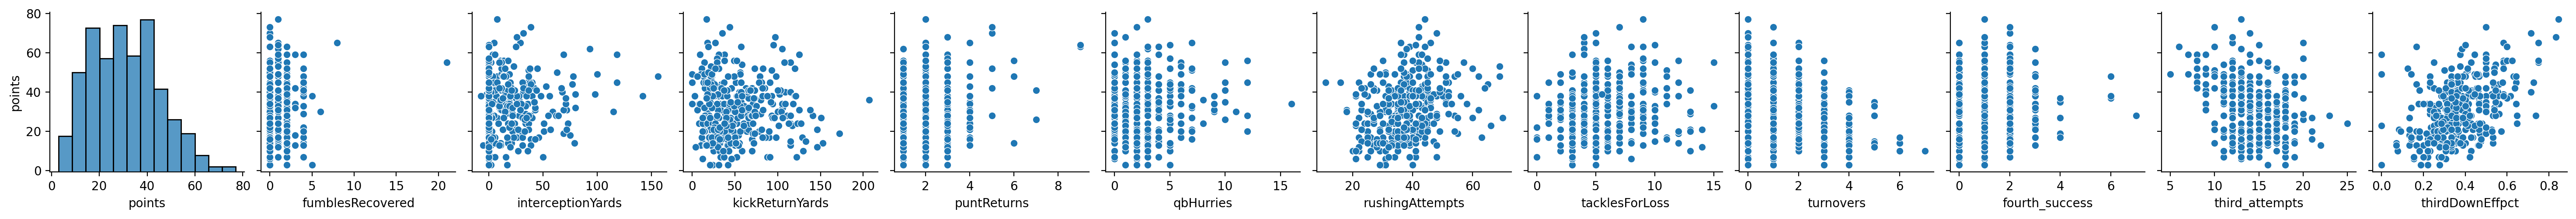

In [221]:
# Testing assumption of linearity
sns.pairplot(data=df_lr5,
                  y_vars=['points'],
                  x_vars=lr5_vars)

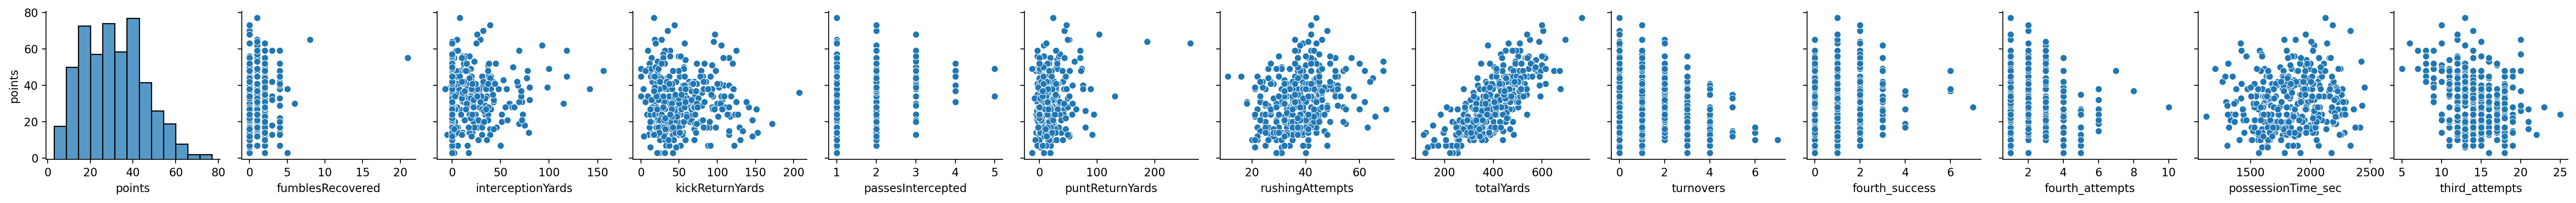

In [222]:
# Testing assumption of linearity
sns.pairplot(data=df_lrnna,
                  y_vars=['points'],
                  x_vars=lr_nna_vars)

In [223]:
# Exploring outliers
df_num_no_na.query('fumblesRecovered > 10')

,game_id,points,defensiveTDs,firstDowns,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,...,fourthEffpct,possession_min_temp,possession_sec_temp,possessionTime_sec,third_success,third_attempts,thirdDownEffpct,penalty_flags,penalty_yards,win_loss
551,401415015,55,0.0,33.0,0.0,21.0,0.0,0.0,1.0,0.0,...,0.5,36.0,9.0,2169.0,7.0,12.0,0.583333,3.0,25.0,1


### Muliticollinearity

In [231]:
df_lr5.corr()

,points,fumblesRecovered,interceptionYards,kickReturnYards,puntReturns,qbHurries,rushingAttempts,tacklesForLoss,turnovers,fourth_success,third_attempts,thirdDownEffpct
points,1.000000,0.123713,0.195141,-0.016273,0.147804,0.119137,0.281080,0.138258,-0.333435,0.149719,-0.340707,0.453989
fumblesRecovered,0.123713,1.000000,0.023870,-0.115295,-0.111490,0.083041,0.033157,0.066664,-0.086766,-0.055621,-0.029002,-0.012347
interceptionYards,0.195141,0.023870,1.000000,-0.109253,-0.063888,-0.073578,-0.103198,-0.030807,-0.074957,-0.052946,-0.156027,0.023583
kickReturnYards,-0.016273,-0.115295,-0.109253,1.000000,-0.069727,-0.099689,-0.108100,-0.122638,0.104852,0.004700,-0.016036,-0.085440
puntReturns,0.147804,-0.111490,-0.063888,-0.069727,1.000000,0.184929,0.002072,0.123226,0.022024,-0.034005,-0.014593,-0.018491
qbHurries,0.119137,0.083041,-0.073578,-0.099689,0.184929,1.000000,0.077535,0.158918,0.025688,-0.123175,0.024734,0.030549
rushingAttempts,0.281080,0.033157,-0.103198,-0.108100,0.002072,0.077535,1.000000,0.017463,-0.145131,0.257519,0.204674,0.294027
tacklesForLoss,0.138258,0.066664,-0.030807,-0.122638,0.123226,0.158918,0.017463,1.000000,0.022400,-0.060130,-0.100135,-0.052065
turnovers,-0.333435,-0.086766,-0.074957,0.104852,0.022024,0.025688,-0.145131,0.022400,1.000000,-0.100397,0.003061,-0.112724
fourth_success,0.149719,-0.055621,-0.052946,0.004700,-0.034005,-0.123175,0.257519,-0.060130,-0.100397,1.000000,0.184357,-0.054650


In [232]:
# possessionTime_sec and rushingAttempts have a correlation of 0.60 
# totalYards and Points have a correlation of 0.75
# Fourth success and fourth attempts have a corrlelation of 0.68
df_lrnna.corr()

,points,fumblesRecovered,interceptionYards,kickReturnYards,passesIntercepted,puntReturnYards,rushingAttempts,totalYards,turnovers,fourth_success,fourth_attempts,possessionTime_sec,third_attempts
points,1.000000,0.123713,0.195141,-0.016273,0.216441,0.247315,0.281080,0.746757,-0.333435,0.149719,-0.149019,0.107392,-0.340707
fumblesRecovered,0.123713,1.000000,0.023870,-0.115295,0.011358,-0.028926,0.033157,0.042521,-0.086766,-0.055621,0.003496,-0.005600,-0.029002
interceptionYards,0.195141,0.023870,1.000000,-0.109253,0.450102,0.011239,-0.103198,-0.046578,-0.074957,-0.052946,-0.123176,-0.096671,-0.156027
kickReturnYards,-0.016273,-0.115295,-0.109253,1.000000,-0.137404,-0.035358,-0.108100,-0.019137,0.104852,0.004700,0.059118,-0.077910,-0.016036
passesIntercepted,0.216441,0.011358,0.450102,-0.137404,1.000000,0.046109,-0.011071,0.044802,-0.092378,-0.028605,-0.101419,-0.024194,-0.133508
puntReturnYards,0.247315,-0.028926,0.011239,-0.035358,0.046109,1.000000,0.066352,0.125758,-0.086657,0.028043,-0.014209,0.021520,-0.065349
rushingAttempts,0.281080,0.033157,-0.103198,-0.108100,-0.011071,0.066352,1.000000,0.237788,-0.145131,0.257519,0.099027,0.605013,0.204674
totalYards,0.746757,0.042521,-0.046578,-0.019137,0.044802,0.125758,0.237788,1.000000,-0.126473,0.154594,0.013028,0.224658,-0.138006
turnovers,-0.333435,-0.086766,-0.074957,0.104852,-0.092378,-0.086657,-0.145131,-0.126473,1.000000,-0.100397,0.090837,-0.057364,0.003061
fourth_success,0.149719,-0.055621,-0.052946,0.004700,-0.028605,0.028043,0.257519,0.154594,-0.100397,1.000000,0.682158,0.273565,0.184357


In [234]:
# These values appear to have issues 
print(pearsonr(df_lrnna.possessionTime_sec, df_lrnna.rushingAttempts))
print(pearsonr(df_lrnna.totalYards, df_lrnna.points))
print(pearsonr(df_lrnna.fourth_success, df_lrnna.fourth_attempts))

PearsonRResult(statistic=0.6050130467728791, pvalue=8.166107327919457e-38)
PearsonRResult(statistic=0.7467567081439228, pvalue=2.8503084046455507e-66)
PearsonRResult(statistic=0.6821583354832229, pvalue=2.707373333378147e-51)


### Constant Variance (Homoscdasticity)

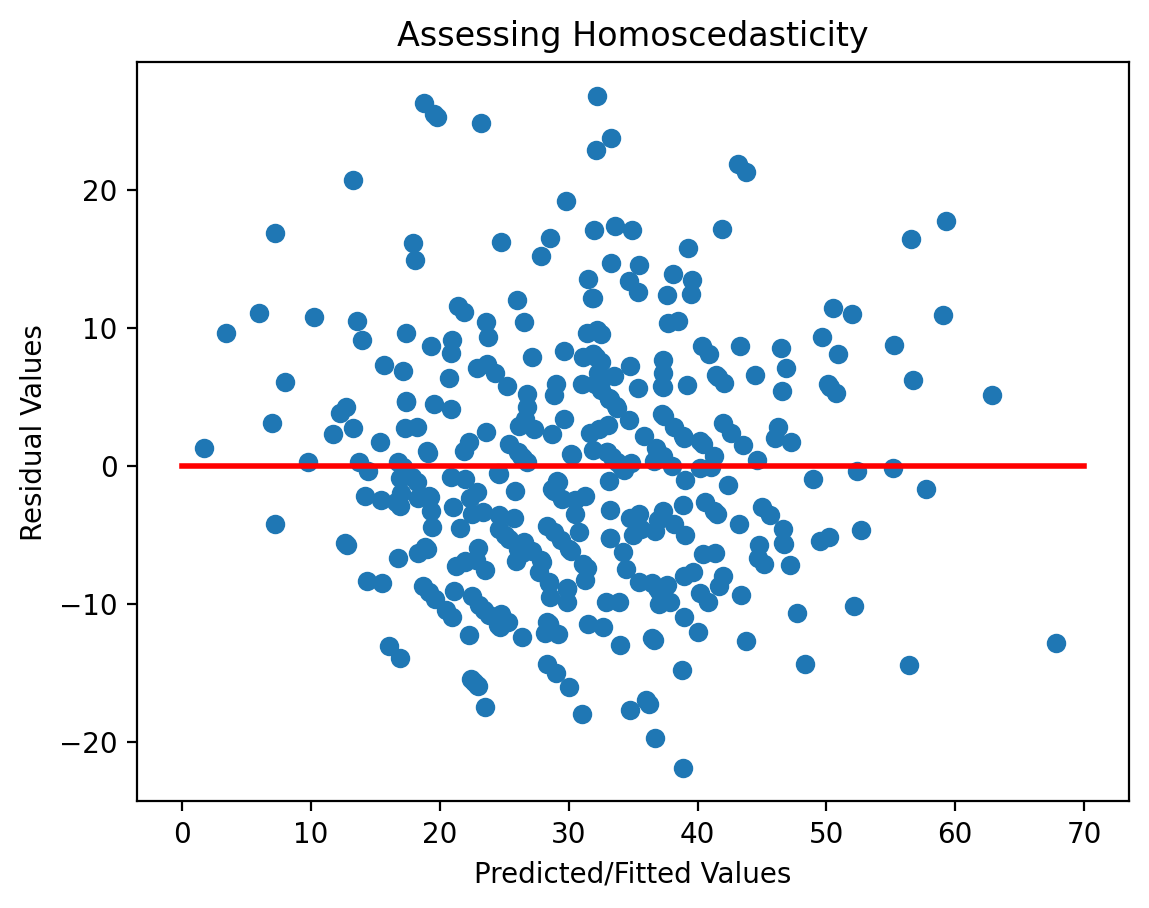

In [238]:
#Assess homoscedasticity
# Values are distributed evenly across the axis
plt.scatter(linreg5.fittedvalues, linreg5.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([0, 70],[0, 0], 'red', lw=2)   #Add horizontal line
plt.show()

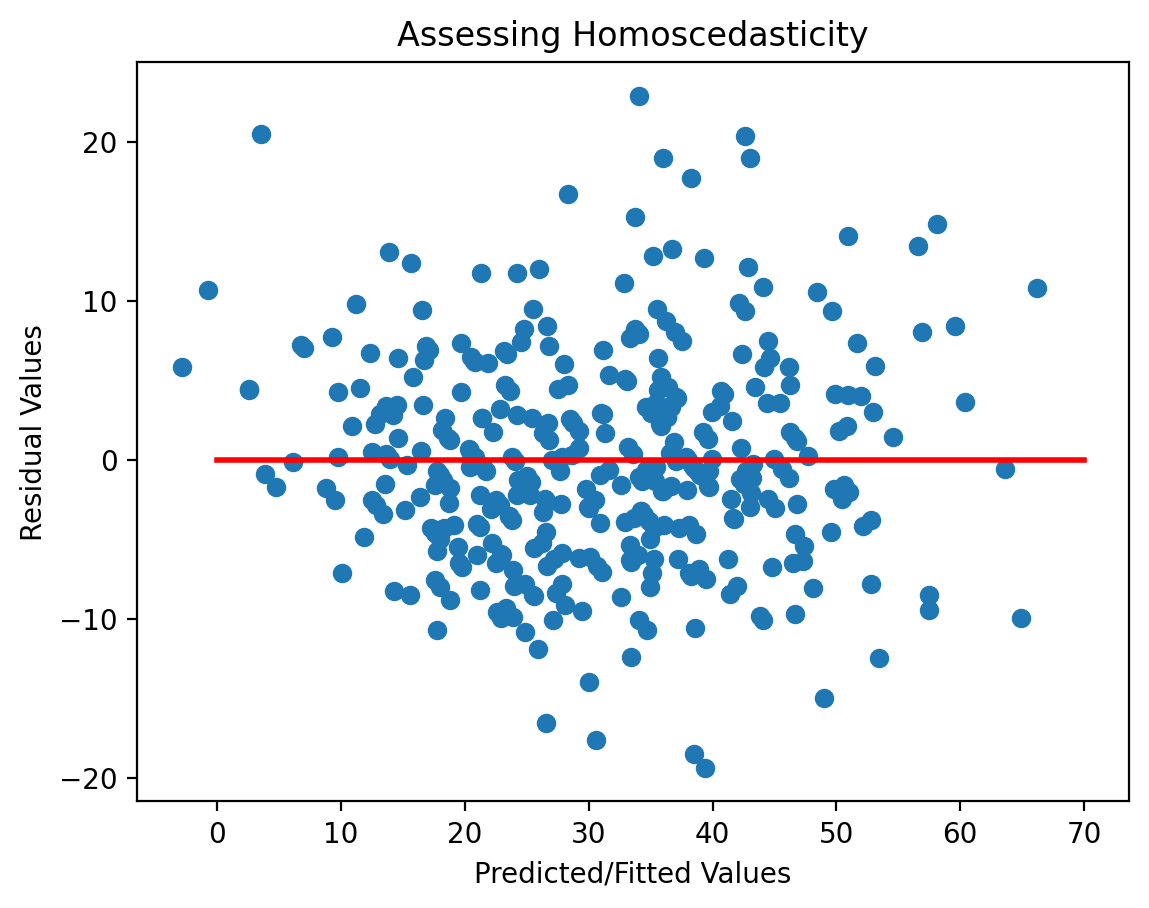

In [239]:
#Assess homoscedasticity
# Values are distributed evenly across the axis
plt.scatter(linreg_nona3.fittedvalues, linreg_nona3.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([0, 70],[0, 0], 'red', lw=2)   #Add horizontal line
plt.show()

### Independence 

In [226]:
# Dubin-Watson Test (if prob JB significant - reject that there is indpendence)
# The result is significant; therefore, there is evidence to suggest this ASSUMPTION IS VIOLATED.
linreg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     46.98
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.96e-62
Time:                        06:30:24   Log-Likelihood:                -1324.1
No. Observations:                 365   AIC:                             2672.
Df Residuals:                     353   BIC:                             2719.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.5822      3.665      5.343      0.000      12.374      26.791
fumblesRecovered      0.9960      0.299      3.336      0.001       0.409       1.583
interceptionYards     0.0934      0.020      4.658      0.000       0.054       0.133
kickReturnYards       0.0506      0.015      3.480      0.001       0.022       0.079
puntReturns           1.8664      0.406      4.594      0.000       1.067       2.665
qbHurries             0.5792      0.198      2.926      0.004       0.190       0.969
rushingAttempts       0.2412      0.058      4.162      0.000       0.127       0.355
tacklesForLoss        0.5499      0.172      3.194      0.002       0.211       0.889
turnovers            -2.5350      0.375     -6.762      0.000      -3.272      -1.798
fourth_success        3.0125      0.489      6.165      0.000       2.051       3.973
third_attempts       -1.9687      0.171    -11.546      0.000      -2.304      -1.633
thirdDownEffpct      45.6620      3.733     12.232      0.000      38.320      53.004
==============================================================================
Omnibus:                        9.632   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.941
Skew:                           0.404   Prob(JB):                      0.00694
Kurtosis:                       2.982   Cond. No.                         622.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
# Dubin-Watson Test (if prob JB significant - reject that there is indpendence)
# The result is significant; therefore, there is evidence to suggest this ASSUMPTION IS VIOLATED.
linreg_nona3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     104.4
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          4.63e-108
Time:                        06:31:39   Log-Likelihood:                -1211.8
No. Observations:                 365   AIC:                             2450.
Df Residuals:                     352   BIC:                             2500.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4088      3.311      1.936      0.054      -0.103      12.921
fumblesRecovered       0.7718      0.218      3.537      0.000       0.343       1.201
interceptionYards      0.0873      0.016      5.359      0.000       0.055       0.119
kickReturnYards        0.0307      0.011      2.894      0.004       0.010       0.052
passesIntercepted      1.3010      0.547      2.380      0.018       0.226       2.376
puntReturnYards        0.0694      0.014      4.838      0.000       0.041       0.098
rushingAttempts        0.2881      0.049      5.876      0.000       0.192       0.384
totalYards             0.0860      0.004     23.509      0.000       0.079       0.093
turnovers             -1.7540      0.283     -6.197      0.000      -2.311      -1.197
fourth_success         2.7176      0.499      5.448      0.000       1.736       3.699
fourth_attempts       -2.2967      0.408     -5.634      0.000      -3.098      -1.495
possessionTime_sec    -0.0058      0.002     -3.141      0.002      -0.010      -0.002
third_attempts        -0.8776      0.139     -6.295      0.000      -1.152      -0.603
==============================================================================
Omnibus:                       10.998   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.021
Skew:                           0.342   Prob(JB):                      0.00245
Kurtosis:                       3.567   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Normally Distributed Residuals

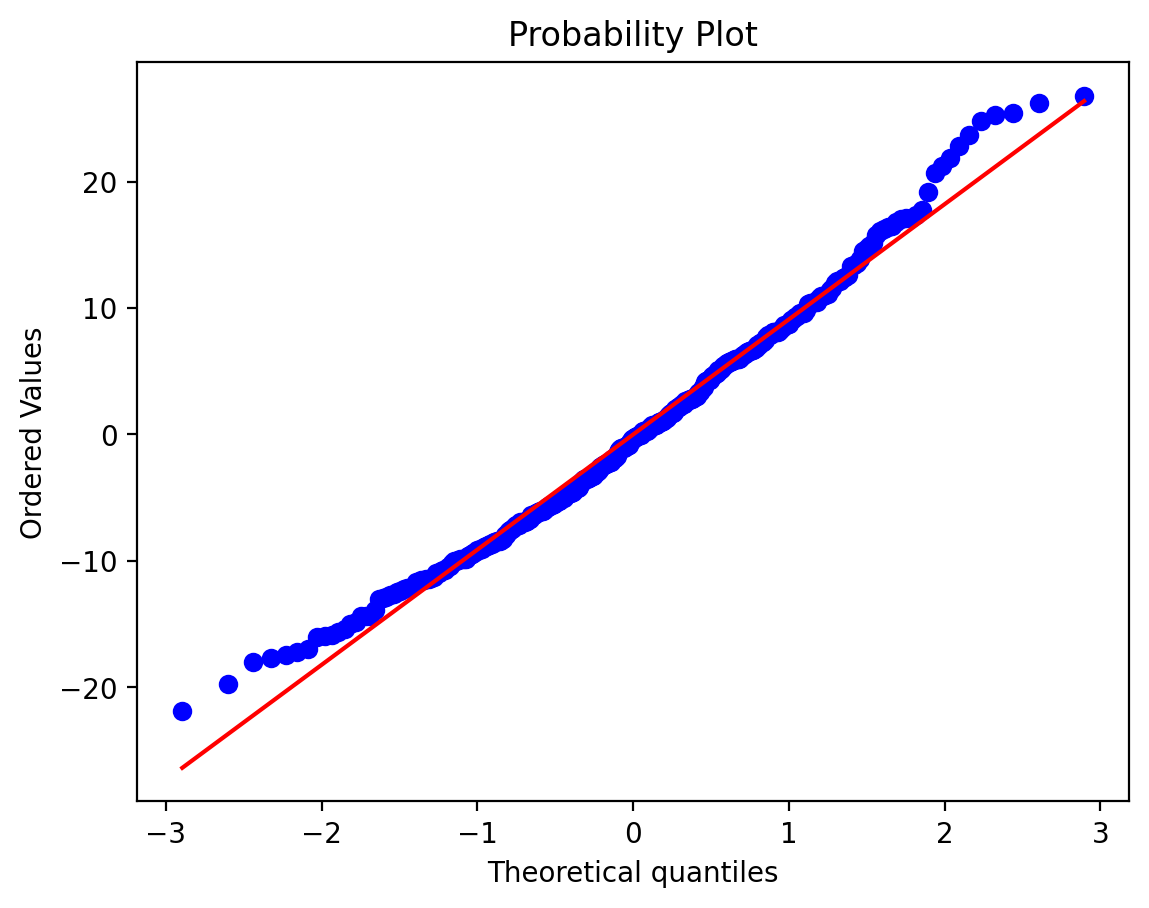

In [228]:
# QQ-plot
# Appears to be slightly violated indicated by the tail end of the distributions going above/below the line
sts.probplot(linreg5.resid, dist="norm", plot=plt)
plt.show()

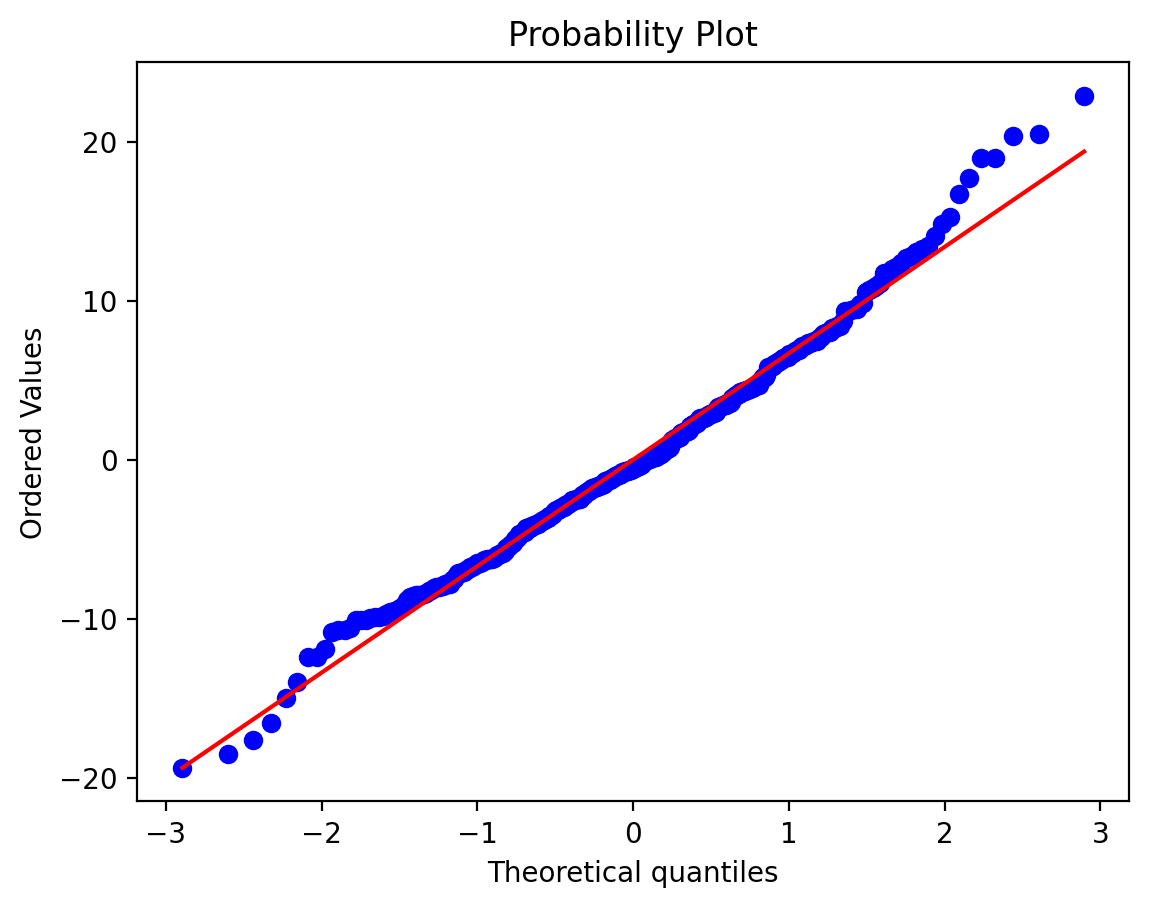

In [229]:
# QQ-plot
# Appears to be slightly violated indicated by the tail end of the distributions going above/below the line
sts.probplot(linreg_nona3.resid, dist="norm", plot=plt)
plt.show()